# COGS 108 - Final Project

## Overview

As the COVID-19 virus continues to spread in the world, its impacts have largely changed the global economy. We decided to find out to what extent does COVID-19 affects market price. In order to find out the answer, we use both COVID-19 daily confirmed cases and commodity price data within the COVID-19 period, thus measuring changes in commodity market price as well as its relationship with COVID-19 cases.  

After cleaning and analyzing our data, we found that the market price in the food industry increased or stayed stable while market demand in the oil industry declined. At the same time, the results showed that the market price of rice and orange juice are more likely to be related to the new CoronaVirus cases, while the models on new coronavirus cases and market prices of rice, milk, and crude oil are more likely to be predictive. 


## Names

- Bingzhe Wang
- Mingjing Yin
- Dennis Wu
- Jialu Sui
- Yichen Yang

## Research Question

How does the development of COVID-19 affect the commodity prices in the market?


## Background and Prior Work

Starting in early March, the widespread trending of the CoronaVirus has changed our world greatly in many different aspects. In particular, the economic effects of suspending almost all activities have greatly impacted the commodity market, and are likely to continue affecting it for a very long time. Due to the impact of COVID-19, the unemployment rate continuously increases in America. Many people have lost their jobs or received lower salaries, which would force them to change their consumer behavior significantly. This change in consumer behaviors would alter the general trending of the commodity market, and also would greatly impact the commodity prices in the commodity market. Therefore, we became interested in finding out how exactly do these special circumstances affect the commodity market prices, and find out what insight we can get from here. Luckily, some elites have already done significant research around this topic, and ended up with some interesting results. For example, researchers in reference 1 analyzed the changes in commodity prices as the coronavirus pandemic worsened, and came up with interesting findings. With their analysis, they found out that “Oil prices have plunged since January, and prices reached a historic low in April with some benchmarks trading at negative levels.” This significant drop in oil prices revealed a significant decrease in the demand for oil in the world, which is a direct result of the restriction on travel in current special situations. Moreover, the energy prices overall, including natural gas and coal, as well as the copper, zinc, and metal prices, are all expected to fall this year. However, as the prices for oil, gas, and metal all experience great decline, the prices for agricultural products have only undergone minor decrease, and the price of rice even rose up in several months. In this way, we can see that the changes in this special situation affect the commodity market in different aspects, and we would like to dig deeper into this.

Moreover, research in reference 2 focused on the agriculture market and revealed the trends in price changes from January to April. The figure below shows the price changes of several commodities over months since the coronavirus became widespread. As we can see in the graph, while the prices of most of the representative agricultural commodities experienced decreases for months, the price of wheat only went through a slight decrease in March and then returned to normal. This finding reminds us to go inside one category among the commodity market, and explore how goods in one category would vary differently.


<img src="data/qz.jpg" alt="quartz commodity plot" width="500" height="600">

References:
1. https://www.worldbank.org/en/news/feature/2020/04/23/coronavirus-shakes-commodity-markets#
2. https://qz.com/1845491/covid-19-has-destabilized-us-food-commodity-prices/

## Hypothesis

The widespread COVID-19 has a great impact on global economic and politics, which results in a potential shift in commodities' market prices. Since consumers started to stock up the most essential food items,  prices for staple foods might increase. Also, there might be a difference in commodity market prices within the food market due to differences in “order of priority” in the food market. Therefore, we propose our hypothesis:
1. In a broader sense, with widespread COVID-19, the market price for food will relatively increase or stay stable, while the price of items in heavy industry such as the crude oil industry might experience a decline.
1. Within the food market, the price for staple foods such as grain will increase while the price for “non-staple” foods such as meat will decrease.


## Dataset(s)

Dataset Name: WHO-COVID-19-global-data.csv
The number of COVID-19 cases from 2/24/20 to 5/23/20 of all the 

We used 2 datasets in our final project:
- Dataset Name: commodity prices by Quandl
- Link to the dataset: https://blog.quandl.com/api-for-commodity-data?utm_source=google&utm_medium=organic&utm_campaign=&utm_content=api-for-futures-data
- Number of observations: We researched 6 different datasets in total, each with the same number of instances. Since the beginning of the pandemic to when the documentation is draft, there are in total 6 * 108 instances.

The first dataset presents the price changes of various commodities in the futures market.

- Dataset Name: WHO-COVID-19-global-data.csv
- Link to the dataset: https://covid19.who.int/
- Number of observations: The dataset contains 22453 instances of daily pandemic information of global countries.

The second dataset provides a chronological recording of the development of the COVID-19 case.

Generally, we used several data science approaches to trace the price changes of different categories of goods in the futures market and find the correlation between commodity market prices and COVID-19 case number to see how does the development of COVID-19 affect the commodity prices in the market.

## Setup

In [1]:
import quandl
import seaborn as sns
import pandas as pd

import numpy as np

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

In [2]:
quandl.ApiConfig.api_key = "J5Moyhm-AkLCtZFyjRND"

## Data Cleaning, Pro-processing and Data Visualization

### Import the Data and Exploratory Data Visualization

#### Commodity Prices

In [3]:
rice = quandl.get("CHRIS/CME_RR1").iloc[-108:][["Open"]]

In [4]:
rice

,Open
Date,
2020-01-07,12.820
2020-01-08,NaN
2020-01-09,12.910
2020-01-10,12.920
2020-01-13,13.100
...,...
2020-06-04,20.675
2020-06-05,22.210
2020-06-08,19.065


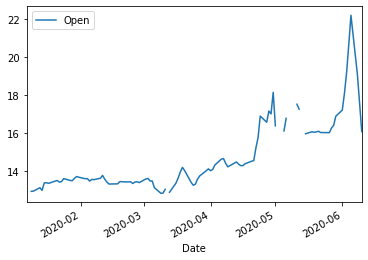

In [5]:
rice.plot(y = "Open")

In [6]:
orangejuice = quandl.get("CHRIS/ICE_OJ1").iloc[-108:][["Open"]]

In [7]:
orangejuice

,Open
Date,
2020-01-10,97.00
2020-01-13,97.10
2020-01-14,95.55
2020-01-15,96.90
2020-01-16,97.15
...,...
2020-06-04,127.65
2020-06-05,125.60
2020-06-08,127.75


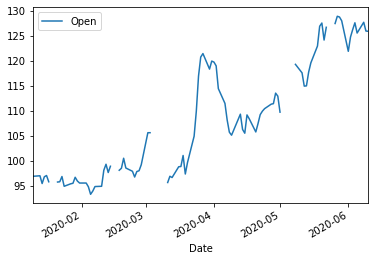

In [8]:
orangejuice.plot(y = "Open")

In [9]:
milk = quandl.get("CHRIS/CME_DA1").iloc[-108:][["Open"]]

In [10]:
milk

,Open
Date,
2020-01-07,17.02
2020-01-08,17.14
2020-01-09,16.96
2020-01-10,16.91
2020-01-13,17.02
...,...
2020-06-04,19.89
2020-06-05,20.10
2020-06-08,19.80


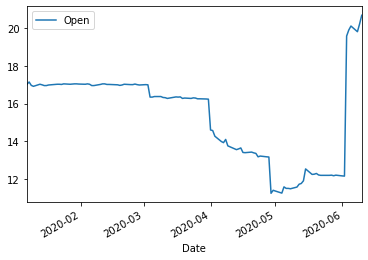

In [11]:
milk.plot(y = "Open")

In [12]:
pork = quandl.get("CHRIS/CME_LN1").iloc[-108:][["Open"]]

In [13]:
pork

,Open
Date,
2020-01-07,68.625
2020-01-08,68.775
2020-01-09,68.900
2020-01-10,67.325
2020-01-13,66.975
...,...
2020-06-04,48.525
2020-06-05,48.450
2020-06-08,47.000


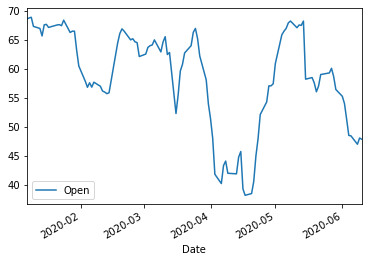

In [14]:
pork.plot(y = "Open")

In [15]:
soybean = quandl.get("CHRIS/CME_S1").iloc[-108:][["Open"]]

In [16]:
soybean

,Open
Date,
2020-01-07,933.50
2020-01-08,936.25
2020-01-09,943.25
2020-01-10,931.50
2020-01-13,938.50
...,...
2020-06-04,857.00
2020-06-05,868.00
2020-06-08,869.25


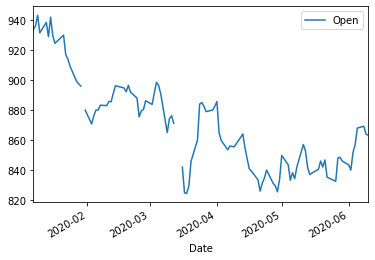

In [17]:
soybean.plot(y = "Open")

In [18]:
crudeoil = quandl.get("CHRIS/CME_RB1").iloc[-108:][["Open"]]

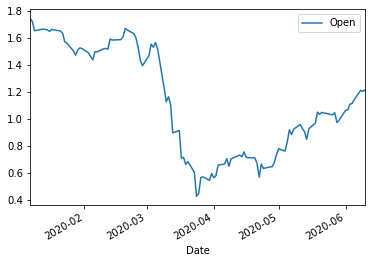

In [19]:
crudeoil.plot(y = "Open")

### The Visualization of COVID-19 global cases

#### Coronavirus 

In [20]:
corona = pd.read_csv("data/WHO-COVID-19-global-data.csv")

In [21]:
corona

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-02-24T00:00:00Z,AF,Afghanistan,EMRO,1,1,0,0
1,2020-02-25T00:00:00Z,AF,Afghanistan,EMRO,0,1,0,0
2,2020-02-26T00:00:00Z,AF,Afghanistan,EMRO,0,1,0,0
3,2020-02-27T00:00:00Z,AF,Afghanistan,EMRO,0,1,0,0
4,2020-02-28T00:00:00Z,AF,Afghanistan,EMRO,0,1,0,0
...,...,...,...,...,...,...,...,...
20641,2020-06-05T00:00:00Z,ZW,Zimbabwe,AFRO,0,222,0,4
20642,2020-06-06T00:00:00Z,ZW,Zimbabwe,AFRO,43,265,0,4
20643,2020-06-07T00:00:00Z,ZW,Zimbabwe,AFRO,14,279,0,4
20644,2020-06-08T00:00:00Z,ZW,Zimbabwe,AFRO,0,279,0,4


#### Global Data

In [22]:
total_info = corona.groupby("Date_reported").agg(sum)
total_info

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,
2020-01-11T00:00:00Z,41,41,1,1
2020-01-12T00:00:00Z,0,41,0,1
2020-01-13T00:00:00Z,1,42,0,1
2020-01-14T00:00:00Z,1,43,0,1
2020-01-15T00:00:00Z,0,43,0,1
...,...,...,...,...
2020-06-05T00:00:00Z,118528,6535356,4288,387155
2020-06-06T00:00:00Z,127943,6663299,5647,392802
2020-06-07T00:00:00Z,136405,6799704,4586,397388


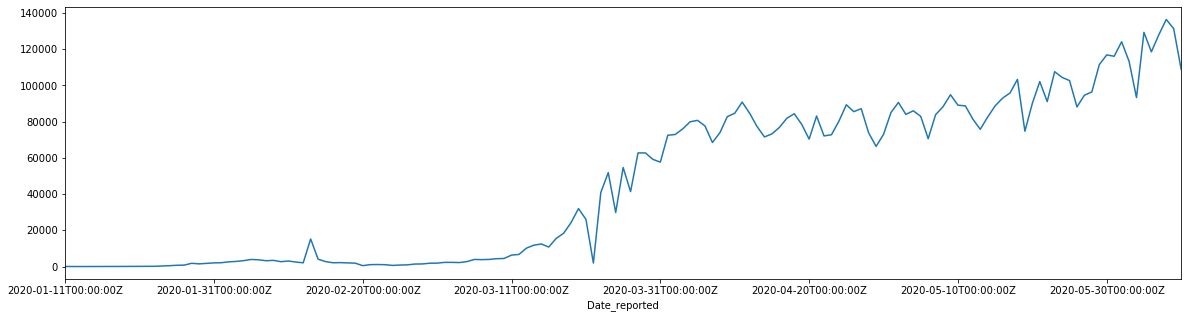

In [23]:
total_info["New_cases"].plot(figsize=(20,5))

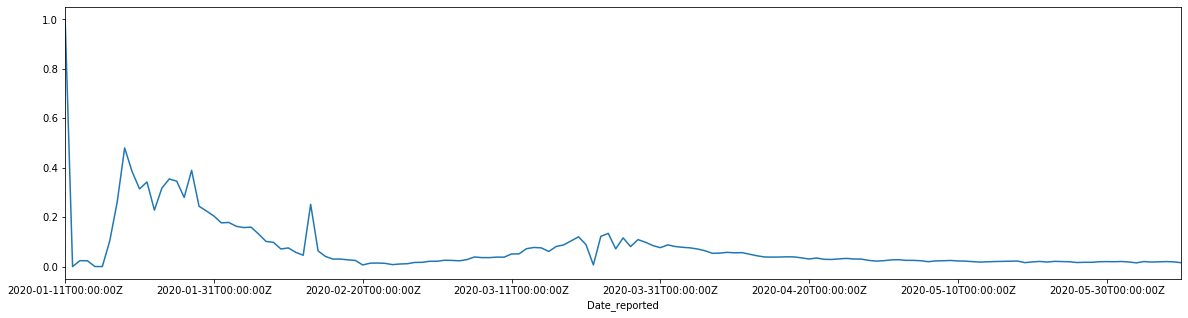

In [24]:
global_percent_change = total_info["New_cases"] / total_info["Cumulative_cases"]
ax1 = global_percent_change.plot(figsize=(20,5))

We found out that the net increase in cases rather thant the percentage change per day is more correlated to the prices.

#### United States Data

In [25]:
us_info = corona.loc[corona["Country_code"] == "US"].groupby("Date_reported").agg(sum)
us_info

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,
2020-01-20T00:00:00Z,1,1,0,0
2020-01-21T00:00:00Z,0,1,0,0
2020-01-22T00:00:00Z,0,1,0,0
2020-01-23T00:00:00Z,0,1,0,0
2020-01-24T00:00:00Z,1,2,0,0
...,...,...,...,...
2020-06-05T00:00:00Z,14583,1837803,825,106876
2020-06-06T00:00:00Z,20069,1857872,1035,107911
2020-06-07T00:00:00Z,28922,1886794,1127,109038


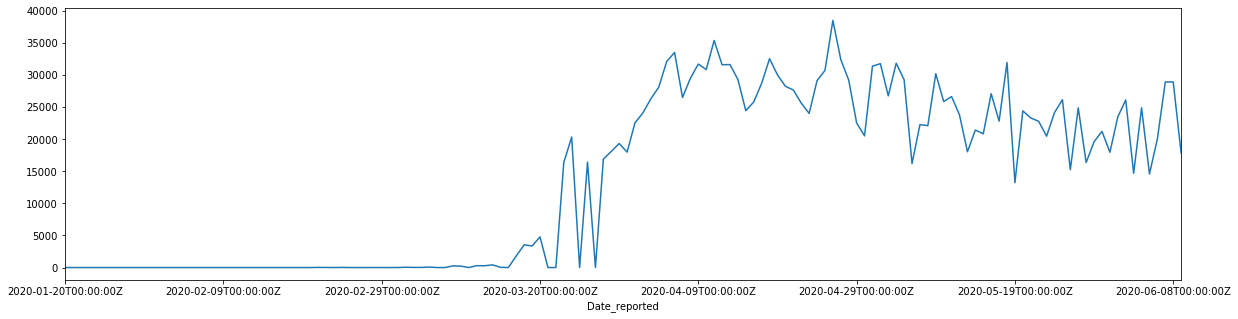

In [26]:
us_info["New_cases"].plot(figsize=(20,5))

### Data Cleaning and Imputation

In [27]:
# imputation NaN with mean
rice = rice.apply(lambda x: x.fillna(x.mean()))
orangejuice = orangejuice.apply(lambda x: x.fillna(x.mean()))
milk = milk.apply(lambda x: x.fillna(x.mean()))
pork = pork.apply(lambda x: x.fillna(x.mean()))
soybean = soybean.apply(lambda x: x.fillna(x.mean()))

In [28]:
# convert the indices of each table to datetime object
total_info.index = pd.to_datetime(total_info.index.str[:10])

In [29]:
# assemble the data
total_info["rice"] = rice
total_info["orangejuice"] = orangejuice
total_info["milk"] = milk
total_info["pork"] = pork
total_info["soybean"] = soybean
total_info["crudeoil"] = crudeoil

In [30]:
total_info = total_info.apply(lambda x: x.fillna(x.mean()))

In [31]:
total_info.drop(["Cumulative_cases", "New_deaths", "Cumulative_deaths"], axis = 1).corr(method='pearson')

,New_cases,rice,orangejuice,milk,pork,soybean,crudeoil
New_cases,1.000000,0.633904,0.680098,-0.464025,-0.401796,-0.551629,-0.522380
rice,0.633904,1.000000,0.712329,-0.271610,-0.318157,-0.516355,-0.312549
orangejuice,0.680098,0.712329,1.000000,-0.445867,-0.280719,-0.519070,-0.526180
milk,-0.464025,-0.271610,-0.445867,1.000000,0.133543,0.655080,0.552555
pork,-0.401796,-0.318157,-0.280719,0.133543,1.000000,0.453519,0.472228
soybean,-0.551629,-0.516355,-0.519070,0.655080,0.453519,1.000000,0.723158
crudeoil,-0.522380,-0.312549,-0.526180,0.552555,0.472228,0.723158,1.000000


In [32]:
total_info

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,rice,orangejuice,milk,pork,soybean,crudeoil
Date_reported,,,,,,,,,,
2020-01-11,41,41,1,1,14.67805,108.15764,15.20233,58.437864,867.373924,1.097726
2020-01-12,0,41,0,1,14.67805,108.15764,15.20233,58.437864,867.373924,1.097726
2020-01-13,1,42,0,1,13.10000,97.10000,17.02000,66.975000,938.500000,1.666800
2020-01-14,1,43,0,1,12.96000,95.55000,16.99000,65.675000,929.000000,1.664400
2020-01-15,0,43,0,1,13.35000,96.90000,16.95000,67.600000,942.000000,1.660500
...,...,...,...,...,...,...,...,...,...,...
2020-06-05,118528,6535356,4288,387155,22.21000,125.60000,20.10000,48.450000,868.000000,1.142800
2020-06-06,127943,6663299,5647,392802,14.67805,108.15764,15.20233,58.437864,867.373924,1.097726
2020-06-07,136405,6799704,4586,397388,14.67805,108.15764,15.20233,58.437864,867.373924,1.097726


## Model

In [33]:
# Rice model

X = total_info[["New_cases"]]
y = total_info.rice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_feat = ['New_cases']
log_tranformer = Pipeline(steps = [
    ("log", FunctionTransformer(lambda x:x))
])



preproc = ColumnTransformer(transformers = [("log", log_tranformer, log_feat)])

pl = Pipeline(steps = [("preprocessor", preproc), ("xgb", xgb.XGBRegressor(ntree_limit = 7))])

pl.fit(X_train, y_train)

preds = pl.predict(X_test)

print("RMSE of rice model is", mean_squared_error(preds, y_test))

rice_result = ["rice", mean_squared_error(preds, y_test)]

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


RMSE of rice model is 3.709755091301337


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [34]:
# Orangejuice model

X = total_info[["New_cases"]]
y = total_info.orangejuice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_feat = ['New_cases']
log_tranformer = Pipeline(steps = [
    ("log", FunctionTransformer(lambda x:x))
])



preproc = ColumnTransformer(transformers = [("log", log_tranformer, log_feat)])

pl = Pipeline(steps = [("preprocessor", preproc), ("xgb", xgb.XGBRegressor(ntree_limit = 7))])

pl.fit(X_train, y_train)

preds = pl.predict(X_test)

print("RMSE of orangejuice model is", mean_squared_error(preds, y_test))
orangejuice_result = ["orangejuice", mean_squared_error(preds, y_test)]

RMSE of orangejuice model is 93.00792810632264


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [35]:
# Milk model

X = total_info[["New_cases"]]
y = total_info.milk

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_feat = ['New_cases']
log_tranformer = Pipeline(steps = [
    ("log", FunctionTransformer(lambda x:x))
])



preproc = ColumnTransformer(transformers = [("log", log_tranformer, log_feat)])

pl = Pipeline(steps = [("preprocessor", preproc), ("xgb", xgb.XGBRegressor(ntree_limit = 7))])

pl.fit(X_train, y_train)

preds = pl.predict(X_test)

print("RMSE of milk model is", mean_squared_error(preds, y_test))
milk_result = ["milk", mean_squared_error(preds, y_test)]

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


RMSE of milk model is 4.555514339746204


In [36]:
# pork model

X = total_info[["New_cases"]]
y = total_info.pork

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_feat = ['New_cases']
log_tranformer = Pipeline(steps = [
    ("log", FunctionTransformer(lambda x:x))
])



preproc = ColumnTransformer(transformers = [("log", log_tranformer, log_feat)])

pl = Pipeline(steps = [("preprocessor", preproc), ("xgb", xgb.XGBRegressor(ntree_limit = 7))])

pl.fit(X_train, y_train)

preds = pl.predict(X_test)

print("RMSE of pork model is", mean_squared_error(preds, y_test))
pork_result = ["pork", mean_squared_error(preds, y_test)]

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


RMSE of pork model is 45.883057473367394


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [37]:
# Soybean model

X = total_info[["New_cases"]]
y = total_info.soybean

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

log_feat = ['New_cases']
log_tranformer = Pipeline(steps = [
    ("log", FunctionTransformer(lambda x:x))
])



preproc = ColumnTransformer(transformers = [("log", log_tranformer, log_feat)])

pl = Pipeline(steps = [("preprocessor", preproc), ("xgb", xgb.XGBRegressor(ntree_limit = 7))])

pl.fit(X_train, y_train)

preds = pl.predict(X_test)

print("RMSE of soybean model is", mean_squared_error(preds, y_test))
soybean_result = ["soybean", mean_squared_error(preds, y_test)]

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


RMSE of soybean model is 636.0033649991451


In [38]:
# Crudeoil model

X = total_info[["New_cases"]]
y = total_info.crudeoil

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

log_feat = ['New_cases']
log_tranformer = Pipeline(steps = [
    ("log", FunctionTransformer(lambda x:x))
])



preproc = ColumnTransformer(transformers = [("log", log_tranformer, log_feat)])

pl = Pipeline(steps = [("preprocessor", preproc), ("xgb", xgb.XGBRegressor(ntree_limit = 7))])

pl.fit(X_train, y_train)

preds = pl.predict(X_test)

print("RMSE of crudeoil model is", mean_squared_error(preds, y_test))
crudeoil_result = ["crudeoil", mean_squared_error(preds, y_test)]

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


RMSE of crudeoil model is 0.06480532665790946


In [39]:
# Evalutaion DataFrame of the Commdities we analyzed

df = pd.DataFrame([rice_result, 
                  orangejuice_result,
                  milk_result, 
                  pork_result, 
                  soybean_result,
                  crudeoil_result]
                 ).rename({0: "Commodity", 1: "RMSE"}, axis = 1).set_index("Commodity")

df

,RMSE
Commodity,
rice,3.709755
orangejuice,93.007928
milk,4.555514
pork,45.883057
soybean,636.003365
crudeoil,0.064805


## Ethics & Privacy

**Privacy perspective:**
Due to the macroscopic scale of our datasets, all data regarding commodities’ futures market prices and COVID-19 cases include only general statistics within those two fields. Thus, all data are anonymous and do not include any personal information. The content privacy of our data is secured at first hand.

Besides, since our analysis and findings will all be stored in our private repo which only gives access to course professors and teaching assistants, the information we will gain could not be co-opted for nefarious purposes. Finally, as long as the platform discloses the data, we have continuous access to the dataset, thus ensuring the continuous monitoring of our datasets and findings.

**Permission to access perspective:**
Both sources of our datasets published their data publicly to monitor global commodity futures market and COVID-19 development. The open data APIs included in their websites give us full access to acquire the data we need for our analysis.

**Ethical perspective:**
The first dataset we used includes the price levels of certain commodities in the futures market. Since this dataset is only providing an objective description of universal good prices, we don’t suspect it would lead to any bias towards certain communities of people.

The second dataset of our analysis gives us a macro-representation of global COVID-19 cases. All of the cases are recorded in chronological order without distincting the characteristics of patients. This comprehensive and anonymous method of data collection also prevents potential bias towards certain populations.

Finally, both datasets are collected by authority agencies of their field, giving us a warrant of data authenticity. The futures market dataset provides up-to-date commodity prices to direct buyers investing in proper commodities, helping the society to keep a good economic order during the quarantine. The COVID-19 cases dataset monitors virus development and releases related data publicly, fostering the society to better confound this challenge and get back on track. Since both datasets uphold authenticity and are formulated upon good purposes, our analysis will keep a good ethical value as we proceed each step with an intention only to better understand COVID-19’s effects on market preferences in product categories.


## Conclusion & Discussion

**Conclusion:**
We chose the data about commodity prices and the data about coronavirus cases development to see whether the development of COVID-19  would affect the commodity prices in the market. Based on our expectation, we proposed our hypothesis as below:
1. In a broader sense, with widespread COVID-19, the market price for food will relatively increase or stay stable, while the price of items in heavy industry such as the crude oil industry might experience a decline.
1. Within the food market, the price for staple foods such as grain will increase while the price for “non-staple” foods such as meat will decrease.

Based on the observation and comparison upon our visualized datasets about the food industry and oil industries, we can see that the prices for food commodities in the market during the pandemic remain relatively stable, with minor increases or decreases, while the prices of commodities from oil industries such as crude oil suffer major declines during the pandemic. From this observation and comparison, we can tell that our first hypothesis that during this pandemic, the market prices of food commodities would relatively increase or stay stable while the market prices of goods from oil industries would experience declines is correct.

Based on the observation upon our visualized datasets about different types of foods, we can see that there are some obvious drops in the market prices of some non-staple foods such as pork overtime during the pandemic. At the same time, there are obvious increases in the market prices of staple foods such as rice overtime during the pandemic. From this observation, we can tell that our second hypothesis that within the food market, the prices of staple food would increase while the prices of“non-staple” foods would decrease is correct.

Moreover, the RMSE statistics we calculated suggest that the models on new CoronaVirus cases data and commodity price data of rice, milk, and crude oil are relatively predictive since their RMSE statistics are relatively small, while the RMSE statistics for other commodity models such as the models for orange juice, pork, and soybean are too large for us to consider those as good predictive models.  Furthermore, according to the correlation matrix we generated, the new CoronaVirus cases data has relatively strong positive correlation with rice prices and orange juice prices, and the new CoronaVirus cases data has relatively moderate negative correlation with pork prices, soybean prices and crude oil prices. Along with the RMSE statistics we mentioned above, we can see that the market price of rice and orange juice are more likely to be related to the new CoronaVirus cases, while the model of rice, milk, and crude oil are more likely to be predictive.


**Discussion:**
In the end, most of our analysis upon the datasets turned out that our hypotheses are correct. However, as we calculated the RMSE statistics on models of new COVID cases and commodity prices of some of the food industries, we noticed that there are some datasets showing different patterns compared to the majority of datasets. For example, it is worth noting that the price of orange juice increases while the price of milk decreases. Both of them are non-stable drinks which would experience a decrease in price according to our analysis. Future studies could dive deeper into why orange juice exists as an exception during the outbreak of COVID-19. Alongside with comparing the different commodity prices, we also analyzed the correlation between new COVID cases and the market prices of different foods. We discovered that some of these goods from the food industry, such as rice and orange juice, are more likely to be positively correlated with the new COVID cases, while other goods such as pork, soybeans and crude oil are more likely to be moderately or negatively correlated with the new COVID cases. Future research can also dig deeper into this part to try to figure out why different foods show different correlations with the new cases of the coronavirus.

Although our analysis provides critical information regarding changes in the market price under COVID-19, there are limitations in our research process. Since we are not able to collect commodity price data from the same source, there might exist measurement disparities between different commodity prices, which cause potential effects on our final results. Also, since we only include 100 instances in our training set, the model we generate might not be perfectly accurate since the higher variability leads to large errors. This can be reflected in the inconsistency of the model RMSE. 

The impact of our project on society would be providing valuable information for option dealing. The investor could get insights into the market price under the influence of COVID-19 from our analysis, thus making appropriate investment decisions. At the same time, we find the relationship between the number of COVID-19 cases and the increase in the staple price, which helps policymakers to manage commodity price as well as providing subsidy during the outbreak.


## Team Contributions

- Dennis Wu: topic researching, data collection, data visualization, and model engineering
- Yichen Yang: extensively argued about the feasibility of potential analysis topics and helped finalizing the analysis topic; provided detailed description of datasets; proved the good privacy & ethics values of our analysis.
- Jialu Sui: searching for potential topics and datasets, finalizing the analysis topic, background research and prior work summary, generalizing conclusions, EC video making
- Mingjing Yin: assisted in finalizing analysis topic, proposed research hypothesis, wrote summary and discussion of the research topic; EC video making
- Bingzhe Wang: data cleaning, data visualization, wrote part of conclusion and part of discussion